Building prefix dict from C:\Users\user\斷詞與文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u26dde8eadd1d88361d80552aac827a44.cache


標題 :New York City - Wikipediahttps://en.wikipedia.org › wiki › New_York_City
網址 :/url?q=https://en.wikipedia.org/wiki/New_York_City&sa=U&ved=2ahUKEwjr-uzPt8PlAhWOwpQKHWWgDQ4QFjAQegQICRAB&usg=AOvVaw2ZmQjQ_mx9FUr_PVKkfMbz
標題 :The Official Guide to New York City | nycgo.comhttps://www.nycgo.com
網址 :/url?q=https://www.nycgo.com/&sa=U&ved=2ahUKEwjr-uzPt8PlAhWOwpQKHWWgDQ4QFjARegQIBBAB&usg=AOvVaw3TAEksXhynA-zHsOqOQO8I
標題 :Welcome to NYC.gov | City of New Yorkhttps://www.nyc.gov
網址 :/url?q=https://www.nyc.gov/&sa=U&ved=2ahUKEwjr-uzPt8PlAhWOwpQKHWWgDQ4QFjASegQIBhAB&usg=AOvVaw1gi-gRdRUxfc5aarYRSo4p
標題 :The Official Website of New York Statehttps://www.ny.gov
網址 :/url?q=https://www.ny.gov/&sa=U&ved=2ahUKEwjr-uzPt8PlAhWOwpQKHWWgDQ4QFjAZegQIBxAB&usg=AOvVaw1AOKRtkzgn0NheOiAiEXqa
標題 :New York Hotels, Things To Do | Official Guide To New York Statehttps://www.iloveny.com
網址 :/url?q=https://www.iloveny.com/&sa=U&ved=2ahUKEwjr-uzPt8PlAhWOwpQKHWWgDQ4QFjAaegQIARAB&usg=AOvVaw1vnesdrGy2YZdtwFj-R08E
標題 :New 

Loading model cost 0.999 seconds.
Prefix dict has been built succesfully.


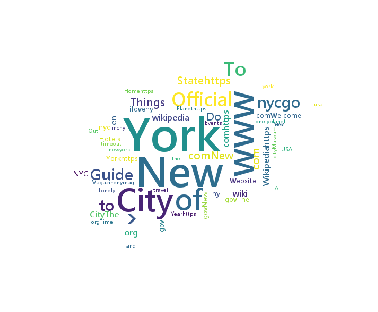

In [9]:
import requests
from bs4 import BeautifulSoup

google_url = 'http://www.google.com.tw/search'

my_params = {'q':'new york'}

r = requests.get(google_url, params = my_params)

if r.status_code == requests.codes.ok:
    soup = BeautifulSoup(r.text,'html.parser')
    
    items = soup.select('div.kCrYT > a[href^="/url"]')
    
    for i in items:
        print("標題 :" + i.text)
        print("網址 :" + i.get('href'))
# WordCloud  文字雲

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

text = ''
for i in items:
    text = text + i.text
print( text)
 
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量


font = "C:\\Windows\\Fonts\\msjhbd.ttc"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("helloworld.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔